In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/Data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head()

,tweet_id,sentiment,name,text,tweet_created,tweet_location,user_timezone
0,1,neutral,cairdin,What @dhepburn said.,24/02/15 11:35,NaN,Eastern Time (US & Canada)
1,2,positive,jnardino,plus you've added commercials to the experienc...,24/02/15 11:15,NaN,Pacific Time (US & Canada)
2,3,neutral,yvonnalynn,I didn't today... Must mean I need to take ano...,24/02/15 11:15,Lets Play,Central Time (US & Canada)
3,4,negative,jnardino,"it's really aggressive to blast obnoxious ""ent...",24/02/15 11:15,NaN,Pacific Time (US & Canada)
4,5,negative,jnardino,and it's a really big bad thing about it,24/02/15 11:14,NaN,Pacific Time (US & Canada)


In [ ]:
pd.value_counts(data['sentiment'])

negative    9178
neutral     3099
positive    2363
Name: sentiment, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        14640 non-null  int64 
 1   sentiment       14640 non-null  object
 2   name            14640 non-null  object
 3   text            14640 non-null  object
 4   tweet_created   14640 non-null  object
 5   tweet_location  9907 non-null   object
 6   user_timezone   9820 non-null   object
dtypes: int64(1), object(6)
memory usage: 800.8+ KB


In [ ]:
data.shape

(14640, 7)

In [ ]:
tweets = pd.read_csv('/content/Data.csv', usecols=['text'])
tweets.head()

,text
0,What @dhepburn said.
1,plus you've added commercials to the experienc...
2,I didn't today... Must mean I need to take ano...
3,"it's really aggressive to blast obnoxious ""ent..."
4,and it's a really big bad thing about it


In [ ]:
tweets["text"].isnull().sum() 

0

In [ ]:
pd.value_counts(tweets["text"]).head()

#NAME?        27
thanks        17
thank you!    15
thanks!       12
thank you     11
Name: text, dtype: int64

## Data cleaning

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('\B#\w*[a-zA-Z]+\w*', '', text)
    text = re.sub("[^A-Za-z" "]+", " ", text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
# Let's take a look at the updated text
a = tweets["text"].apply(lambda x:clean_text(x))

In [ ]:
a.head()

0                                  what dhepburn said 
1    plus you ve added commercials to the experienc...
2    i didn t today must mean i need to take anothe...
3    it s really aggressive to blast obnoxious ente...
4             and it s a really big bad thing about it
Name: text, dtype: object

In [ ]:
type(a)

pandas.core.series.Series

## Remove stop words


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
stop_txt = a.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
stop_txt.head

<bound method NDFrame.head of 0                                            dhepburn said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving minutes late flight warnings communica...
14637                       please bring american airlines
14638    money change flight answer phones suggestions ...
14639    ppl need know many seats next flight plz put u...
Name: text, Length: 14640, dtype: object>

##Lemmatization

In [ ]:
from nltk.stem import PorterStemmer
lemmatizer = nltk.stem.WordNetLemmatizer()

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,'v') for w in w_tokenizer.tokenize(str(text))]


In [ ]:
lemm_txt = stop_txt.apply(lemmatize_text)

In [ ]:
lemm_txt.head

<bound method NDFrame.head of 0                                          [dhepburn, say]
1              [plus, add, commercials, experience, tacky]
2           [today, must, mean, need, take, another, trip]
3        [really, aggressive, blast, obnoxious, enterta...
4                                [really, big, bad, thing]
                               ...                        
14635             [thank, get, different, flight, chicago]
14636    [leave, minutes, late, flight, warn, communica...
14637                  [please, bring, american, airlines]
14638    [money, change, flight, answer, phone, suggest...
14639    [ppl, need, know, many, seat, next, flight, pl...
Name: text, Length: 14640, dtype: object>

##Stemming

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [ ]:
stem_txt = stop_txt.apply(lambda x: ''.join([stemmer.stem(y) for y in x]))
stem_txt.dtype

dtype('O')

In [ ]:
stem_txt.head()

0                                        dhepburn said
1              plus added commercials experience tacky
2               today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
Name: text, dtype: object

## Word Cloud

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
cloud = " ".join(stem_txt)

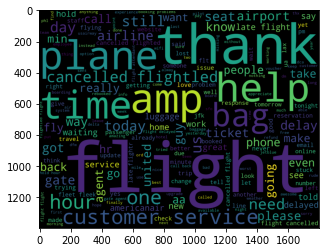

In [ ]:
wordcloud= WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(cloud)

plt.imshow(wordcloud)

## Positive world cloud 

In [ ]:
with open("/content/Positive Words.txt","r") as pos:
  poswords = pos.read().split("\n")

In [ ]:
pos = ' '.join([w for w in stem_txt if w in poswords])

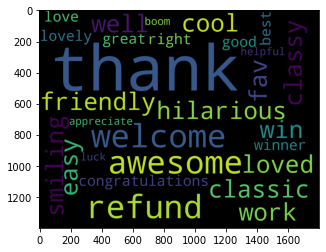

In [ ]:
wordcloud_pos = WordCloud(
                           background_color = 'black',
                           width =1800,
                           height =1400
                           ).generate(str(pos))
plt.imshow(wordcloud_pos)

## Negative word cloud

In [ ]:
with open("/content/Negative Words.txt","r" , encoding='latin-1') as nos:
    negwords = nos.read().split("\n")

In [ ]:
neg =' '.join([w for w in stem_txt if w in negwords])

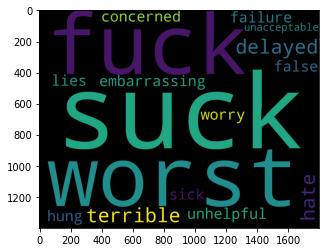

In [ ]:
wordcloud_neg = WordCloud(
                           background_color = 'black',
                           width =1800,
                           height =1400
                           ).generate(str(neg))
plt.imshow(wordcloud_neg)

## N-Gram

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
corpus = stem_txt

In [ ]:
type(corpus)

pandas.core.series.Series

In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

In [ ]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=25)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
top_df.head(25)

,Word,Freq
0,flight,3926
1,get,1341
2,thanks,1066
3,cancelled,1054
4,service,965
5,help,851
6,time,793
7,customer,755
8,us,701
9,amp,683


[Text(0, 0, 'flight'),
 Text(0, 0, 'get'),
 Text(0, 0, 'thanks'),
 Text(0, 0, 'cancelled'),
 Text(0, 0, 'service'),
 Text(0, 0, 'help'),
 Text(0, 0, 'time'),
 Text(0, 0, 'customer'),
 Text(0, 0, 'us'),
 Text(0, 0, 'amp'),
 Text(0, 0, 'hours'),
 Text(0, 0, 'hold'),
 Text(0, 0, 'flights'),
 Text(0, 0, 'plane'),
 Text(0, 0, 'thank'),
 Text(0, 0, 'still'),
 Text(0, 0, 'one'),
 Text(0, 0, 'please'),
 Text(0, 0, 'would'),
 Text(0, 0, 'need'),
 Text(0, 0, 'delayed'),
 Text(0, 0, 'back'),
 Text(0, 0, 'gate'),
 Text(0, 0, 'call'),
 Text(0, 0, 'flightled')]

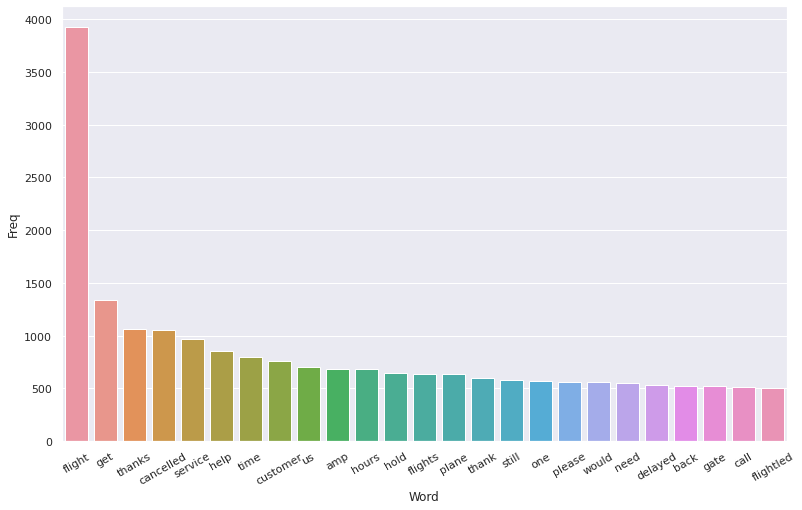

In [ ]:
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

## Bi-grams

In [ ]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [ ]:
#Convert most freq words to dataframe for plotting bar plot
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

                Bi-gram  Freq
0      customer service   562
1   cancelled flightled   505
2           late flight   247
3    cancelled flighted   224
4      flight cancelled   216
5          late flightr   157
6           fleet fleek   146
7      booking problems   144
8      cancelled flight   144
9        flight delayed   131
10            call back   104
11     flightled flight    96
12       flight booking    92
13        jetblue fleet    89
14          please help    84
15           gate agent    77
16             get home    75
17           trying get    69
18           hold hours    68
19        flight flight    64


[Text(0, 0, 'customer service'),
 Text(0, 0, 'cancelled flightled'),
 Text(0, 0, 'late flight'),
 Text(0, 0, 'cancelled flighted'),
 Text(0, 0, 'flight cancelled'),
 Text(0, 0, 'late flightr'),
 Text(0, 0, 'fleet fleek'),
 Text(0, 0, 'booking problems'),
 Text(0, 0, 'cancelled flight'),
 Text(0, 0, 'flight delayed'),
 Text(0, 0, 'call back'),
 Text(0, 0, 'flightled flight'),
 Text(0, 0, 'flight booking'),
 Text(0, 0, 'jetblue fleet'),
 Text(0, 0, 'please help'),
 Text(0, 0, 'gate agent'),
 Text(0, 0, 'get home'),
 Text(0, 0, 'trying get'),
 Text(0, 0, 'hold hours'),
 Text(0, 0, 'flight flight')]

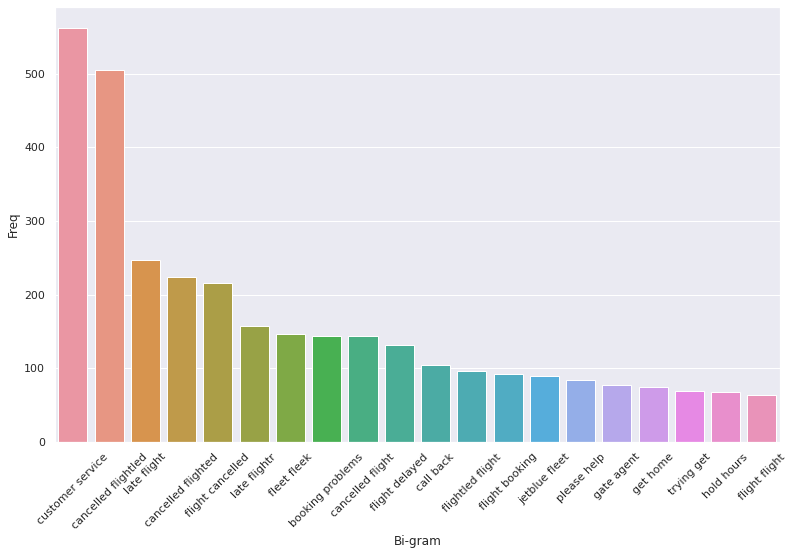

In [ ]:
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

## Tri-grams

In [ ]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [ ]:
#Convert most freq words to dataframe for plotting bar plot
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

                       Tri-gram  Freq
0    flight cancelled flightled   142
1    cancelled flightled flight    96
2       flight booking problems    90
3           jetblue fleet fleek    89
4     flight cancelled flighted    54
5       cancelled flight flight    49
6     reflight booking problems    49
7              rt jetblue fleet    48
8     cancelled flighted flight    45
9        worst customer service    41
10  cancelled flightled flights    35
11           hours late flightr    34
12            hours late flight    24
13           worst airline ever    22
14        poor customer service    21
15           late flightr still    20
16       great customer service    19
17    terrible customer service    19
18         flight delayed hours    18
19        call customer service    18


[Text(0, 0, 'flight cancelled flightled'),
 Text(0, 0, 'cancelled flightled flight'),
 Text(0, 0, 'flight booking problems'),
 Text(0, 0, 'jetblue fleet fleek'),
 Text(0, 0, 'flight cancelled flighted'),
 Text(0, 0, 'cancelled flight flight'),
 Text(0, 0, 'reflight booking problems'),
 Text(0, 0, 'rt jetblue fleet'),
 Text(0, 0, 'cancelled flighted flight'),
 Text(0, 0, 'worst customer service'),
 Text(0, 0, 'cancelled flightled flights'),
 Text(0, 0, 'hours late flightr'),
 Text(0, 0, 'hours late flight'),
 Text(0, 0, 'worst airline ever'),
 Text(0, 0, 'poor customer service'),
 Text(0, 0, 'late flightr still'),
 Text(0, 0, 'great customer service'),
 Text(0, 0, 'terrible customer service'),
 Text(0, 0, 'flight delayed hours'),
 Text(0, 0, 'call customer service')]

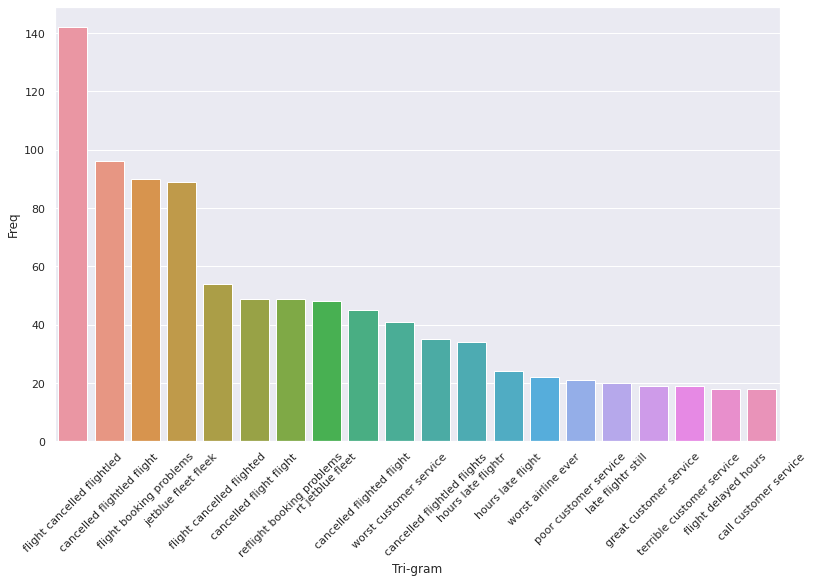

In [ ]:
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tvec_ta = TfidfVectorizer(stop_words='english', ngram_range=(1,1))
tvec_weights_ta = tvec_ta.fit_transform(stem_txt.dropna())

weights_ta = np.asarray(tvec_weights_ta.mean(axis=0)).ravel().tolist()
weights_df_ta = pd.DataFrame({'term': tvec_ta.get_feature_names(), 'weight': weights_ta})
weights_df_ta=weights_df_ta.sort_values(by='weight', ascending=False)
weights_df_ta.head(10)

,term,weight
3462,flight,0.038912
9089,thanks,0.022275
9084,thank,0.016841
1332,cancelled,0.015156
8099,service,0.014271
4140,help,0.013947
9193,time,0.012247
2215,customer,0.011847
4225,hold,0.011657
4315,hours,0.011650


## Topic Modeling with Gensim

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 17.1MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=063b667f7cac90a4819fe112626237426073663fe48f254f43ca9ebc5b1a67f1
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:
# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
#import logging
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

#import warnings
#warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
# Import Dataset
df = pd.read_csv('/content/Data.csv')
print(df.text.unique())
df.head()

['What @dhepburn said.'
 "plus you've added commercials to the experience... tacky."
 "I didn't today... Must mean I need to take another trip!" ...
 'Please bring American Airlines to #BlackBerry10'
 "you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"
 'we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?']


,tweet_id,sentiment,name,text,tweet_created,tweet_location,user_timezone
0,1,neutral,cairdin,What @dhepburn said.,24/02/15 11:35,NaN,Eastern Time (US & Canada)
1,2,positive,jnardino,plus you've added commercials to the experienc...,24/02/15 11:15,NaN,Pacific Time (US & Canada)
2,3,neutral,yvonnalynn,I didn't today... Must mean I need to take ano...,24/02/15 11:15,Lets Play,Central Time (US & Canada)
3,4,negative,jnardino,"it's really aggressive to blast obnoxious ""ent...",24/02/15 11:15,NaN,Pacific Time (US & Canada)
4,5,negative,jnardino,and it's a really big bad thing about it,24/02/15 11:14,NaN,Pacific Time (US & Canada)


In [ ]:
# Convert to list
data = df.text.values.tolist()

In [ ]:
# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['What said.']


<input>:2: DeprecationWarning: invalid escape sequence \S
<input>:2: DeprecationWarning: invalid escape sequence \S
<input>:2: DeprecationWarning: invalid escape sequence \S
<input>:2: DeprecationWarning: invalid escape sequence \S
<input>:2: DeprecationWarning: invalid escape sequence \S
<input>:2: DeprecationWarning: invalid escape sequence \S
<input>:2: DeprecationWarning: invalid escape sequence \S
<input>:2: DeprecationWarning: invalid escape sequence \S
<input>:2: DeprecationWarning: invalid escape sequence \S
<input>:2: DeprecationWarning: invalid escape sequence \S
<input>:5: DeprecationWarning: invalid escape sequence \s
<input>:2: DeprecationWarning: invalid escape sequence \S
<input>:5: DeprecationWarning: invalid escape sequence \s
<input>:2: DeprecationWarning: invalid escape sequence \S
<input>:5: DeprecationWarning: invalid escape sequence \s
<input>:2: DeprecationWarning: invalid escape sequence \S
<input>:5: DeprecationWarning: invalid escape sequence \s
<input>:2: Dep

In [ ]:
#Tokenize words and Clean-up text
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [ ]:
data_words = list(sent_to_words(data))

In [ ]:
print(data_words[:1])

[['what', 'said']]


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[3]]])

['its', 'really', 'aggressive', 'to', 'blast', 'obnoxious', 'entertainment', 'in', 'your', 'guests', 'faces', 'amp', 'they', 'have', 'little', 'recourse']


In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [ ]:
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

In [ ]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [ ]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

In [ ]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['say']]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

In [ ]:
# Create Corpus
texts = data_lemmatized

In [ ]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
# View
print(corpus[:1])

[[(0, 1)]]


In [ ]:
id2word[0]

'say'

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('say', 1)]]

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.071*"agent" + 0.061*"day" + 0.037*"luggage" + 0.029*"hang" + '
  '0.028*"issue" + 0.023*"staff" + 0.022*"rebook" + 0.020*"look" + '
  '0.018*"long" + 0.018*"understand"'),
 (1,
  '0.151*"s" + 0.121*"co" + 0.083*"put" + 0.043*"busy" + 0.030*"almost" + '
  '0.030*"handle" + 0.024*"http" + 0.019*"share" + 0.014*"second" + '
  '0.014*"compensate"'),
 (2,
  '0.098*"back" + 0.083*"book" + 0.076*"sit" + 0.073*"amp" + 0.060*"due" + '
  '0.055*"never" + 0.055*"morning" + 0.043*"come" + 0.040*"last" + '
  '0.025*"load"'),
 (3,
  '0.340*"call" + 0.060*"line" + 0.052*"rebooke" + 0.030*"option" + '
  '0.022*"air" + 0.022*"employee" + 0.020*"tweet" + 0.020*"pick" + '
  '0.017*"enough" + 0.013*"amazing"'),
 (4,
  '0.125*"bad" + 0.120*"take" + 0.095*"leave" + 0.075*"really" + '
  '0.058*"system" + 0.040*"care" + 0.033*"suppose" + 0.021*"plan" + '
  '0.020*"catering" + 0.019*"big"'),
 (5,
  '0.351*"thank" + 0.200*"time" + 0.043*"first" + 0.032*"different" + '
  '0.016*"push" + 0.013*"concern"

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt


Perplexity:  -8.03445775050276


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
print('\nPerplexity:', lda_model)


Perplexity: LdaModel(num_terms=6872, num_topics=20, decay=0.5, chunksize=100)


In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.47756500182102196


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19    -0.399300 -0.231254       1        1  11.441560
0     -0.110428  0.238634       2        1   8.770660
18    -0.087915  0.118942       3        1   7.559429
10    -0.122716  0.273857       4        1   6.724581
12    -0.011444  0.004574       5        1   5.568488
16     0.029955 -0.021993       6        1   5.065662
8      0.048907 -0.029341       7        1   4.546763
6      0.045282 -0.026561       8        1   4.452123
13     0.023874 -0.018315       9        1   4.330217
15     0.028000 -0.021214      10        1   4.270304
2      0.039945 -0.025057      11        1   4.256167
5      0.054934 -0.030999      12        1   4.199195
9      0.060173 -0.029737      13        1   4.012245
3      0.008021 -0.006421      14        1   3.975702
4      0.048639 -0.027754      15        1   3.780319
7      0.067727 -0.033932      16        1   3.706560
11     0.049426 -0.028171      17        1   3.699149
1      0.078003 -0.035174      18        1   3.326345
14     0.076721 -0.034378      19        1   3.196304
17     0.072197 -0.035706      20        1   3.118227, topic_info=            Term         Freq        Total Category  logprob  loglift
25        flight  3708.000000  3708.000000  Default  30.0000  30.0000
67         thank  1455.000000  1455.000000  Default  29.0000  29.0000
112         call  1334.000000  1334.000000  Default  28.0000  28.0000
180          get  1438.000000  1438.000000  Default  27.0000  27.0000
46          hour  1242.000000  1242.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1158         pre    15.826322    16.687980  Topic20  -5.2701   3.4149
853   stewardess    14.029250    14.890908  Topic20  -5.3907   3.4083
3172       nasty    13.846448    14.708106  Topic20  -5.4038   3.4075
424      imagine    12.761038    13.622732  Topic20  -5.4854   3.4026
4115      buying    13.703783    15.465068  Topic20  -5.4141   3.3470

[638 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
5765     17  0.969538  aadvantage
116       9  0.991886        able
381      17  0.951617    absolute
729      12  0.973536  absolutely
905      15  0.991890      accept
...     ...       ...         ...
514      20  0.987091       wrong
161       5  0.993050        year
398       1  0.996575   yesterday
61        1  0.991525         yet
2540      5  0.941425       young

[608 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 1, 19, 11, 13, 17, 9, 7, 14, 16, 3, 6, 10, 4, 5, 8, 12, 2, 15, 18])